<a href="https://colab.research.google.com/github/Lithikhaa/house_price_prediction/blob/main/house_price_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/housepricedata.csv')

In [3]:
df.head(10)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [4]:
val = df.values
val
#gives only values

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [5]:
X = val[:,0:10] #first 9 column except last column
Y = val[:,10]   #only last column

In [6]:
from sklearn import preprocessing

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X) #used for normalize the value

In [8]:
X_scale #preprocessed data

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scale, Y, test_size=0.3)
#x_train -- 700rows 10 col
#x_test -- 300rows 10 col
#y_train -- 700rows 1 col(0,1)--output col
#y_test -- 300rows 1 col(0,1)--output col

In [11]:
Y_train

array([1, 1, 0, ..., 0, 1, 0])

In [12]:
#cross validation -- 1.validation  2.test (splits)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5)
#only test_data(x_test,y_test) will split for cross validation into val,test

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [14]:
Y_val

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [15]:
from keras.models import Sequential#for sequential order to run
from keras.layers import Dense #layers

In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),#32 -- neuron in hiddenlayer inside
    Dense(32, activation='relu'),#10 -- input
    Dense(1, activation='sigmoid'),#1 -- output layer
])

In [17]:
model.compile(optimizer='sgd',#stochastic gradient desent
              loss='binary_crossentropy',#loss calculation
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.7067 - accuracy: 0.4912 - val_loss: 0.7025 - val_accuracy: 0.4429
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5597 - val_loss: 0.6894 - val_accuracy: 0.6027
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.6135 - val_loss: 0.6799 - val_accuracy: 0.6530
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.6634 - val_loss: 0.6724 - val_accuracy: 0.7123
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.7055 - val_loss: 0.6652 - val_accuracy: 0.7534
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.7446 - val_loss: 0.6583 - val_accuracy: 0.7763
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.7789 - val_loss: 0.6529 - val_accuracy: 0.7808
Epoch 8/100


In [19]:
model.evaluate(X_test, Y_test)[1] #the model has found 89% correctly was able to find from the dataset

7/7 [==============================] - 0s 3ms/step - loss: 0.2541 - accuracy: 0.8904


0.8904109597206116

In [20]:
import matplotlib.pyplot as plt

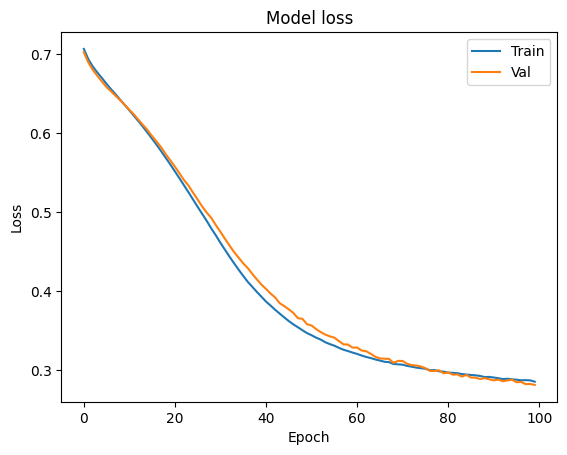

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()